In [1]:
import pickle
import matplotlib.pyplot as plt
import torchvision
import torch

In [2]:
model_name = "MNIST_MLP"
dataset_name = "MNIST"
loss_fn_name = "CrossEntropyLoss"
momentum = 0.0
target_acc = 0.97
nb_file = 0

# Adam

In [11]:
optimizer_name = "Adam"
lr = 0.001
batch_size_min = 5
batch_size_max = 13
batch_sizes_adam = [2**i for i in range(batch_size_min, batch_size_max+1)]

In [12]:
hyperoptimization = 0
name_file = "results/" + model_name + "_" + optimizer_name + "_" + dataset_name + "_" + loss_fn_name + "_" + str(lr) + "_" + str(momentum) + "_" + str(hyperoptimization) +  "_" + str(batch_size_min) + "_" + str(batch_size_max) + "_" + str(target_acc) + "_" + str(nb_file) + ".pkl"

with open(name_file, 'rb') as f:
    steps_adam_normal, times_adam_normal = pickle.load(f)

hyperoptimization = 1
name_file = "results/" + model_name + "_" + optimizer_name + "_" + dataset_name + "_" + loss_fn_name + "_" + str(lr) + "_" + str(momentum) + "_" + str(hyperoptimization) +  "_" + str(batch_size_min) + "_" + str(batch_size_max) + "_" + str(target_acc) + "_" + str(nb_file) + ".pkl"


with open(name_file, 'rb') as f:
    steps_adam_hyperopt, times_adam_hyperopt = pickle.load(f)

# SGD

In [13]:
optimizer_name = "SGD"
lr = 0.1
batch_size_min = 5
batch_size_max = 11
batch_sizes_sgd = [2**i for i in range(batch_size_min, batch_size_max+1)]

In [14]:
hyperoptimization = 0
name_file = "results/" + model_name + "_" + optimizer_name + "_" + dataset_name + "_" + loss_fn_name + "_" + str(lr) + "_" + str(momentum) + "_" + str(hyperoptimization) +  "_" + str(batch_size_min) + "_" + str(batch_size_max) + "_" + str(target_acc) + "_" + str(nb_file) + ".pkl"

with open(name_file, 'rb') as f:
    steps_sgd_normal= pickle.load(f)

hyperoptimization = 1
name_file = "results/" + model_name + "_" + optimizer_name + "_" + dataset_name + "_" + loss_fn_name + "_" + str(lr) + "_" + str(momentum) + "_" + str(hyperoptimization) +  "_" + str(batch_size_min) + "_" + str(batch_size_max) + "_" + str(target_acc) + "_" + str(nb_file) + ".pkl"


with open(name_file, 'rb') as f:
    steps_sgd_hyperopt = pickle.load(f)

# PLOT

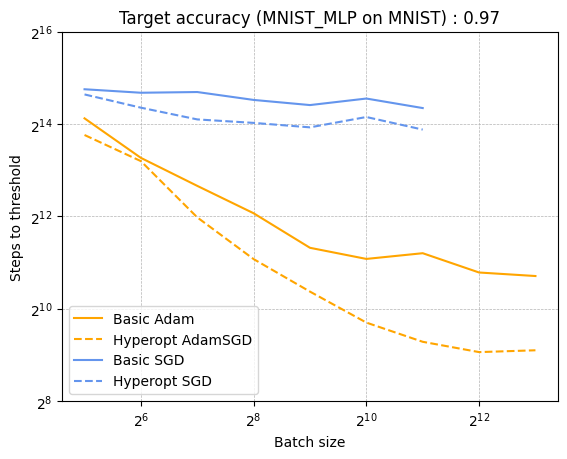

In [19]:
# Créer la figure et les axes
fig, ax = plt.subplots()

# Tracer les courbes
ax.plot(batch_sizes_adam, steps_adam_normal, label="Basic Adam", color='orange')
ax.plot(batch_sizes_adam, steps_adam_hyperopt, label="Hyperopt Adam"+optimizer_name, linestyle="--", color='orange')

ax.plot(batch_sizes_sgd, steps_sgd_normal, label="Basic SGD", color='cornflowerblue')
ax.plot(batch_sizes_sgd, steps_sgd_hyperopt, label="Hyperopt SGD", linestyle="--", color='cornflowerblue')

# Ajouter les légendes, les titres et les échelles
ax.legend()
ax.set_title("Target accuracy ({} on {}) : {}".format(model_name, dataset_name, str(target_acc)))
ax.set_xlabel("Batch size")
ax.set_ylabel("Steps to threshold")
ax.set_xscale("log", base=2)
ax.set_yscale("log", base=2)

# Ajouter le quadrillage
ax.grid(True, which="both", ls="--", lw=0.5, color="0.7")

# Définir les limites de l'axe y
ax.set_ylim([2**8, 2**16])

# Afficher la figure
plt.show()